# VGG Net Architecture Comparison

In this web article https://towardsdatascience.com/cnn-architectures-a-deep-dive-a99441d18049
the VGG Net is introduced with 6 main variants to its architecture. This
notebook compares 5 of them:

- VGG-11
- VGG-13
- VGG-16
- VGG-16(Conv1)
- VGG-19

VGG-11(LRN) is excluded as Tensorflow-Keras v1.14 does not have an
implementation for LRN layers.

The best performing model is chosen for further hyper-parameter tuning.

Published paper: https://arxiv.org/abs/1409.1556


In [1]:
from gc import collect
from typing import Tuple

import matplotlib.pyplot as plt
import numpy as np
from h5py import File
from pandas import read_csv
from sklearn.metrics import accuracy_score, classification_report, \
    confusion_matrix
from tensorflow.config.experimental import list_physical_devices, \
    set_memory_growth
from tensorflow.keras.backend import clear_session
from tensorflow.keras.callbacks import CSVLogger, LearningRateScheduler, \
    ModelCheckpoint, EarlyStopping
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Input, MaxPool2D
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.random import set_random_seed


### Model Creation Functions


In [2]:
# VGG-11
def create_vgg11(input_shape: Tuple[int, int, int], num_classes: int) -> Model:
    inputs = Input(shape=input_shape)
    
    layer = Conv2D(filters=64, kernel_size=(3, 3), strides=1, padding="same", 
                   activation="relu", kernel_initializer="he_normal",
                   bias_initializer="he_normal")(inputs)
    layer = MaxPool2D(pool_size=(2, 2), strides=2)(layer)

    layer = Conv2D(filters=128, kernel_size=(3, 3), strides=1, padding="same", 
                   activation="relu", kernel_initializer="he_normal",
                   bias_initializer="he_normal")(layer)
    layer = MaxPool2D(pool_size=(2, 2), strides=2)(layer)
    
    layer = Conv2D(filters=256, kernel_size=(3, 3), strides=1, padding="same", 
                   activation="relu", kernel_initializer="he_normal",
                   bias_initializer="he_normal")(layer)
    layer = Conv2D(filters=256, kernel_size=(3, 3), strides=1, padding="same", 
                   activation="relu", kernel_initializer="he_normal",
                   bias_initializer="he_normal")(layer)
    layer = MaxPool2D(pool_size=(2, 2), strides=2)(layer)
    
    layer = Conv2D(filters=512, kernel_size=(3, 3), strides=1, padding="same", 
                   activation="relu", kernel_initializer="he_normal",
                   bias_initializer="he_normal")(layer)
    layer = Conv2D(filters=512, kernel_size=(3, 3), strides=1, padding="same", 
                   activation="relu", kernel_initializer="he_normal",
                   bias_initializer="he_normal")(layer)
    layer = MaxPool2D(pool_size=(2, 2), strides=2)(layer)
    
    layer = Conv2D(filters=512, kernel_size=(3, 3), strides=1, padding="same", 
                   activation="relu", kernel_initializer="he_normal",
                   bias_initializer="he_normal")(layer)
    layer = Conv2D(filters=512, kernel_size=(3, 3), strides=1, padding="same", 
                   activation="relu", kernel_initializer="he_normal",
                   bias_initializer="he_normal")(layer)
    layer = MaxPool2D(pool_size=(2, 2), strides=2)(layer)
    
    layer = Flatten()(layer)
    layer = Dense(units=4096, activation="relu", 
                  kernel_initializer="he_normal", 
                  bias_initializer="he_normal")(layer)
    layer = Dense(units=4096, activation="relu", 
                  kernel_initializer="he_normal", 
                  bias_initializer="he_normal")(layer)
    layer = Dense(num_classes, activation="softmax")(layer)
    
    model = Model(inputs=inputs, outputs=layer)
    model.compile(optimizer=Adam(learning_rate=0.0001), 
                  loss="categorical_crossentropy", metrics=["accuracy"])
    
    return model


# VGG-13
def create_vgg13(input_shape: Tuple[int, int, int], num_classes: int) -> Model:
    inputs = Input(shape=input_shape)
    
    layer = Conv2D(filters=64, kernel_size=(3, 3), strides=1, padding="same", 
                   activation="relu", kernel_initializer="he_normal",
                   bias_initializer="he_normal")(inputs)
    layer = Conv2D(filters=64, kernel_size=(3, 3), strides=1, padding="same", 
                   activation="relu", kernel_initializer="he_normal",
                   bias_initializer="he_normal")(layer)
    layer = MaxPool2D(pool_size=(2, 2), strides=2)(layer)

    layer = Conv2D(filters=128, kernel_size=(3, 3), strides=1, padding="same", 
                   activation="relu", kernel_initializer="he_normal",
                   bias_initializer="he_normal")(layer)
    layer = Conv2D(filters=128, kernel_size=(3, 3), strides=1, padding="same", 
                   activation="relu", kernel_initializer="he_normal",
                   bias_initializer="he_normal")(layer)
    layer = MaxPool2D(pool_size=(2, 2), strides=2)(layer)
    
    layer = Conv2D(filters=256, kernel_size=(3, 3), strides=1, padding="same", 
                   activation="relu", kernel_initializer="he_normal",
                   bias_initializer="he_normal")(layer)
    layer = Conv2D(filters=256, kernel_size=(3, 3), strides=1, padding="same", 
                   activation="relu", kernel_initializer="he_normal",
                   bias_initializer="he_normal")(layer)
    layer = MaxPool2D(pool_size=(2, 2), strides=2)(layer)
    
    layer = Conv2D(filters=512, kernel_size=(3, 3), strides=1, padding="same", 
                   activation="relu", kernel_initializer="he_normal",
                   bias_initializer="he_normal")(layer)
    layer = Conv2D(filters=512, kernel_size=(3, 3), strides=1, padding="same", 
                   activation="relu", kernel_initializer="he_normal",
                   bias_initializer="he_normal")(layer)
    layer = MaxPool2D(pool_size=(2, 2), strides=2)(layer)
    
    layer = Conv2D(filters=512, kernel_size=(3, 3), strides=1, padding="same", 
                   activation="relu", kernel_initializer="he_normal",
                   bias_initializer="he_normal")(layer)
    layer = Conv2D(filters=512, kernel_size=(3, 3), strides=1, padding="same", 
                   activation="relu", kernel_initializer="he_normal",
                   bias_initializer="he_normal")(layer)
    layer = MaxPool2D(pool_size=(2, 2), strides=2)(layer)
    
    layer = Flatten()(layer)
    layer = Dense(units=4096, activation="relu", 
                  kernel_initializer="he_normal",
                  bias_initializer="he_normal")(layer)
    layer = Dense(units=4096, activation="relu", 
                  kernel_initializer="he_normal",
                  bias_initializer="he_normal")(layer)
    layer = Dense(num_classes, activation="softmax")(layer)
    
    model = Model(inputs=inputs, outputs=layer)
    model.compile(optimizer=Adam(learning_rate=0.0001), 
                  loss="categorical_crossentropy", metrics=["accuracy"])
    
    return model


# VGG-16
def create_vgg16(input_shape: Tuple[int, int, int], num_classes: int) -> Model:
    inputs = Input(shape=input_shape)
    
    layer = Conv2D(filters=64, kernel_size=(3, 3), strides=1, padding="same", 
                   activation="relu", kernel_initializer="he_normal",
                   bias_initializer="he_normal")(inputs)
    layer = Conv2D(filters=64, kernel_size=(3, 3), strides=1, padding="same", 
                   activation="relu", kernel_initializer="he_normal",
                   bias_initializer="he_normal")(layer)
    layer = MaxPool2D(pool_size=(2, 2), strides=2)(layer)

    layer = Conv2D(filters=128, kernel_size=(3, 3), strides=1, padding="same", 
                   activation="relu", kernel_initializer="he_normal",
                   bias_initializer="he_normal")(layer)
    layer = Conv2D(filters=128, kernel_size=(3, 3), strides=1, padding="same", 
                   activation="relu", kernel_initializer="he_normal",
                   bias_initializer="he_normal")(layer)
    layer = MaxPool2D(pool_size=(2, 2), strides=2)(layer)
    
    layer = Conv2D(filters=256, kernel_size=(3, 3), strides=1, padding="same", 
                   activation="relu", kernel_initializer="he_normal",
                   bias_initializer="he_normal")(layer)
    layer = Conv2D(filters=256, kernel_size=(3, 3), strides=1, padding="same", 
                   activation="relu", kernel_initializer="he_normal",
                   bias_initializer="he_normal")(layer)
    layer = Conv2D(filters=256, kernel_size=(3, 3), strides=1, padding="same", 
                   activation="relu", kernel_initializer="he_normal",
                   bias_initializer="he_normal")(layer)
    layer = MaxPool2D(pool_size=(2, 2), strides=2)(layer)
    
    layer = Conv2D(filters=512, kernel_size=(3, 3), strides=1, padding="same", 
                   activation="relu", kernel_initializer="he_normal",
                   bias_initializer="he_normal")(layer)
    layer = Conv2D(filters=512, kernel_size=(3, 3), strides=1, padding="same", 
                   activation="relu", kernel_initializer="he_normal",
                   bias_initializer="he_normal")(layer)
    layer = Conv2D(filters=512, kernel_size=(3, 3), strides=1, padding="same", 
                   activation="relu", kernel_initializer="he_normal",
                   bias_initializer="he_normal")(layer)
    layer = MaxPool2D(pool_size=(2, 2), strides=2)(layer)
    
    layer = Conv2D(filters=512, kernel_size=(3, 3), strides=1, padding="same", 
                   activation="relu", kernel_initializer="he_normal",
                   bias_initializer="he_normal")(layer)
    layer = Conv2D(filters=512, kernel_size=(3, 3), strides=1, padding="same", 
                   activation="relu", kernel_initializer="he_normal",
                   bias_initializer="he_normal")(layer)
    layer = Conv2D(filters=512, kernel_size=(3, 3), strides=1, padding="same", 
                   activation="relu", kernel_initializer="he_normal",
                   bias_initializer="he_normal")(layer)
    layer = MaxPool2D(pool_size=(2, 2), strides=2)(layer)
    
    layer = Flatten()(layer)
    layer = Dense(units=4096, activation="relu", 
                  kernel_initializer="he_normal",
                  bias_initializer="he_normal")(layer)
    layer = Dense(units=4096, activation="relu", 
                  kernel_initializer="he_normal",
                  bias_initializer="he_normal")(layer)
    layer = Dense(num_classes, activation="softmax")(layer)
    
    model = Model(inputs=inputs, outputs=layer)
    model.compile(optimizer=Adam(learning_rate=0.0001), 
                  loss="categorical_crossentropy", metrics=["accuracy"])
    
    return model


# VGG-16(Conv1)
def create_vgg16_conv1(input_shape: Tuple[int, int, int], num_classes: int) \
        -> Model:
    inputs = Input(shape=input_shape)
    
    layer = Conv2D(filters=64, kernel_size=(3, 3), strides=1, padding="same", 
                   activation="relu", kernel_initializer="he_normal",
                   bias_initializer="he_normal")(inputs)
    layer = Conv2D(filters=64, kernel_size=(3, 3), strides=1, padding="same", 
                   activation="relu", kernel_initializer="he_normal",
                   bias_initializer="he_normal")(layer)
    layer = MaxPool2D(pool_size=(2, 2), strides=2)(layer)

    layer = Conv2D(filters=128, kernel_size=(3, 3), strides=1, padding="same", 
                   activation="relu", kernel_initializer="he_normal",
                   bias_initializer="he_normal")(layer)
    layer = Conv2D(filters=128, kernel_size=(3, 3), strides=1, padding="same", 
                   activation="relu", kernel_initializer="he_normal",
                   bias_initializer="he_normal")(layer)
    layer = MaxPool2D(pool_size=(2, 2), strides=2)(layer)
    
    layer = Conv2D(filters=256, kernel_size=(3, 3), strides=1, padding="same", 
                   activation="relu", kernel_initializer="he_normal",
                   bias_initializer="he_normal")(layer)
    layer = Conv2D(filters=256, kernel_size=(3, 3), strides=1, padding="same", 
                   activation="relu", kernel_initializer="he_normal",
                   bias_initializer="he_normal")(layer)
    layer = Conv2D(filters=256, kernel_size=(1, 1), strides=1, padding="same", 
                   activation="relu", kernel_initializer="he_normal",
                   bias_initializer="he_normal")(layer)
    layer = MaxPool2D(pool_size=(2, 2), strides=2)(layer)
    
    layer = Conv2D(filters=512, kernel_size=(3, 3), strides=1, padding="same", 
                   activation="relu", kernel_initializer="he_normal",
                   bias_initializer="he_normal")(layer)
    layer = Conv2D(filters=512, kernel_size=(3, 3), strides=1, padding="same", 
                   activation="relu", kernel_initializer="he_normal",
                   bias_initializer="he_normal")(layer)
    layer = Conv2D(filters=512, kernel_size=(1, 1), strides=1, padding="same", 
                   activation="relu", kernel_initializer="he_normal",
                   bias_initializer="he_normal")(layer)
    layer = MaxPool2D(pool_size=(2, 2), strides=2)(layer)
    
    layer = Conv2D(filters=512, kernel_size=(3, 3), strides=1, padding="same", 
                   activation="relu", kernel_initializer="he_normal",
                   bias_initializer="he_normal")(layer)
    layer = Conv2D(filters=512, kernel_size=(3, 3), strides=1, padding="same", 
                   activation="relu", kernel_initializer="he_normal",
                   bias_initializer="he_normal")(layer)
    layer = Conv2D(filters=512, kernel_size=(1, 1), strides=1, padding="same", 
                   activation="relu", kernel_initializer="he_normal",
                   bias_initializer="he_normal")(layer)
    layer = MaxPool2D(pool_size=(2, 2), strides=2)(layer)
    
    layer = Flatten()(layer)
    layer = Dense(units=4096, activation="relu", 
                  kernel_initializer="he_normal",
                  bias_initializer="he_normal")(layer)
    layer = Dense(units=4096, activation="relu", 
                  kernel_initializer="he_normal",
                  bias_initializer="he_normal")(layer)
    layer = Dense(num_classes, activation="softmax")(layer)
    
    model = Model(inputs=inputs, outputs=layer)
    model.compile(optimizer=Adam(learning_rate=0.0001), 
                  loss="categorical_crossentropy", metrics=["accuracy"])
    
    return model


# VGG-19
def create_vgg19(input_shape: Tuple[int, int, int], num_classes: int) -> Model:
    inputs = Input(shape=input_shape)
    
    layer = Conv2D(filters=64, kernel_size=(3, 3), strides=1, padding="same", 
                   activation="relu", kernel_initializer="he_normal",
                   bias_initializer="he_normal")(inputs)
    layer = Conv2D(filters=64, kernel_size=(3, 3), strides=1, padding="same", 
                   activation="relu", kernel_initializer="he_normal",
                   bias_initializer="he_normal")(layer)
    layer = MaxPool2D(pool_size=(2, 2), strides=2)(layer)

    layer = Conv2D(filters=128, kernel_size=(3, 3), strides=1, padding="same", 
                   activation="relu", kernel_initializer="he_normal",
                   bias_initializer="he_normal")(layer)
    layer = Conv2D(filters=128, kernel_size=(3, 3), strides=1, padding="same", 
                   activation="relu", kernel_initializer="he_normal",
                   bias_initializer="he_normal")(layer)
    layer = MaxPool2D(pool_size=(2, 2), strides=2)(layer)
    
    layer = Conv2D(filters=256, kernel_size=(3, 3), strides=1, padding="same", 
                   activation="relu", kernel_initializer="he_normal",
                   bias_initializer="he_normal")(layer)
    layer = Conv2D(filters=256, kernel_size=(3, 3), strides=1, padding="same", 
                   activation="relu", kernel_initializer="he_normal",
                   bias_initializer="he_normal")(layer)
    layer = Conv2D(filters=256, kernel_size=(3, 3), strides=1, padding="same", 
                   activation="relu", kernel_initializer="he_normal",
                   bias_initializer="he_normal")(layer)
    layer = Conv2D(filters=256, kernel_size=(3, 3), strides=1, padding="same", 
                   activation="relu", kernel_initializer="he_normal",
                   bias_initializer="he_normal")(layer)
    layer = MaxPool2D(pool_size=(2, 2), strides=2)(layer)
    
    layer = Conv2D(filters=512, kernel_size=(3, 3), strides=1, padding="same", 
                   activation="relu", kernel_initializer="he_normal",
                   bias_initializer="he_normal")(layer)
    layer = Conv2D(filters=512, kernel_size=(3, 3), strides=1, padding="same", 
                   activation="relu", kernel_initializer="he_normal",
                   bias_initializer="he_normal")(layer)
    layer = Conv2D(filters=512, kernel_size=(3, 3), strides=1, padding="same", 
                   activation="relu", kernel_initializer="he_normal",
                   bias_initializer="he_normal")(layer)
    layer = Conv2D(filters=512, kernel_size=(3, 3), strides=1, padding="same", 
                   activation="relu", kernel_initializer="he_normal",
                   bias_initializer="he_normal")(layer)
    layer = MaxPool2D(pool_size=(2, 2), strides=2)(layer)
    
    layer = Conv2D(filters=512, kernel_size=(3, 3), strides=1, padding="same", 
                   activation="relu", kernel_initializer="he_normal",
                   bias_initializer="he_normal")(layer)
    layer = Conv2D(filters=512, kernel_size=(3, 3), strides=1, padding="same", 
                   activation="relu", kernel_initializer="he_normal",
                   bias_initializer="he_normal")(layer)
    layer = Conv2D(filters=512, kernel_size=(3, 3), strides=1, padding="same", 
                   activation="relu", kernel_initializer="he_normal",
                   bias_initializer="he_normal")(layer)
    layer = Conv2D(filters=512, kernel_size=(3, 3), strides=1, padding="same", 
                   activation="relu", kernel_initializer="he_normal",
                   bias_initializer="he_normal")(layer)
    layer = MaxPool2D(pool_size=(2, 2), strides=2)(layer)
    
    layer = Flatten()(layer)
    layer = Dense(units=4096, activation="relu", 
                  kernel_initializer="he_normal",
                  bias_initializer="he_normal")(layer)
    layer = Dense(units=4096, activation="relu", 
                  kernel_initializer="he_normal",
                  bias_initializer="he_normal")(layer)
    layer = Dense(num_classes, activation="softmax")(layer)
    
    model = Model(inputs=inputs, outputs=layer)
    model.compile(optimizer=Adam(learning_rate=0.0001), 
                  loss="categorical_crossentropy", metrics=["accuracy"])
    
    return model


### Other Functions


In [3]:
def refresh_session():
    # Call this before training a new model, to free up memory from the 
    # previous model
    clear_session()
    try:
        del model
    except NameError:
        pass
    collect()
    
    
def import_dataset(filepath: str = "./dataset.hdf5") \
        -> Tuple[np.ndarray, np.ndarray, np.ndarray, 
                 np.ndarray, np.ndarray, np.ndarray]:
    file = File(filepath, "r")
    train_data = file.get("tr_data")[()]
    val_data = file.get("val_data")[()]
    test_data = file.get("ts_data")[()]
    train_labels = file.get("tr_labels")[()]
    val_labels = file.get("val_labels")[()]
    test_labels = file.get("ts_labels")[()]
    
    return train_data, val_data, test_data, \
           train_labels, val_labels, test_labels


def get_test_results(test_model: Model, test_data: np.ndarray, 
                     test_labels: np.ndarray) -> Tuple:
    predicts = test_model.predict(test_data)
    pred_out = np.argmax(predicts, axis=1)
    test_out = np.argmax(test_labels, axis=1)
    labels = ["car", "heavy vehicles", "motorcycle"]
    
    return accuracy_score(test_out, pred_out), \
           confusion_matrix(test_out, pred_out), \
           classification_report(test_out, pred_out, target_names=labels)


def get_learn_rate(epoch: int) -> float:
    if epoch <= 10:
        lr = 1e-4
    elif epoch <= 20:
        lr = 5e-5
    elif epoch <= 30:
        lr = 1e-5
    elif epoch <= 40:
        lr = 5e-6
    else:
        lr = 1e-6
    print(f"Learning rate: {lr}")
    
    return lr


### Initialise Environment

In [4]:
# Configure tensorflow to optimise GPU utilisation
gpu_list = list_physical_devices("GPU")
for gpu in gpu_list:
    set_memory_growth(gpu, True)
del gpu_list

# Fix tensorflow random seed
set_random_seed(324)

tr_dat, val_dat, ts_dat, tr_lbls, val_lbls, ts_lbls = import_dataset()

in_shape = (tr_dat.shape[1], tr_dat.shape[2], tr_dat.shape[3])
num_cls = tr_lbls.shape[1]

lr_scheduler = LearningRateScheduler(get_learn_rate)
early_stopper = EarlyStopping(monitor="val_loss", patience=10, verbose=1, 
                              mode="min", restore_best_weights=True) 

# Test data is not needed in this notebook, so free up the memory
del ts_dat
del ts_lbls
collect()


190

### Model Creation and Training


In [5]:
# VGG-11
refresh_session()
data_gen = ImageDataGenerator(
    rotation_range=45, width_shift_range=0.2, height_shift_range=0.2,
    zoom_range=0.2, horizontal_flip=True)

model = create_vgg11(in_shape, num_cls)
print(model.summary())

checkpoint = ModelCheckpoint("./trained_models/vgg11_best.hdf5", 
                             monitor="val_loss", verbose=0, 
                             save_best_only=True, mode="min")
logger = CSVLogger("./training_logs/vgg11_log.csv")

model.fit_generator(
    data_gen.flow(tr_dat, tr_lbls, batch_size=32, shuffle=True), 
    steps_per_epoch=(len(tr_dat) / 32), epochs=50, verbose=2, 
    callbacks=[checkpoint, logger, lr_scheduler, early_stopper], 
    validation_data=(val_dat, val_lbls))


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 256, 256, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 128)     73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 256)       295168    
_________

In [6]:
# VGG-13
refresh_session()
data_gen = ImageDataGenerator(
    rotation_range=45, width_shift_range=0.2, height_shift_range=0.2,
    zoom_range=0.2, horizontal_flip=True)

model = create_vgg13(in_shape, num_cls)
print(model.summary())

checkpoint = ModelCheckpoint("./trained_models/vgg13_best.hdf5", 
                             monitor="val_loss", verbose=0, 
                             save_best_only=True, mode="min")
logger = CSVLogger("./training_logs/vgg13_log.csv")

model.fit_generator(
    data_gen.flow(tr_dat, tr_lbls, batch_size=32, shuffle=True), 
    steps_per_epoch=(len(tr_dat) / 32), epochs=50, verbose=2, 
    callbacks=[checkpoint, logger, lr_scheduler, early_stopper], 
    validation_data=(val_dat, val_lbls))


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 256, 256, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 256, 256, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 128, 128, 128)     73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 128, 128, 128)     147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 128)       0     

In [5]:
# VGG-16
refresh_session()
data_gen = ImageDataGenerator(
    rotation_range=45, width_shift_range=0.2, height_shift_range=0.2,
    zoom_range=0.2, horizontal_flip=True)

model = create_vgg16(in_shape, num_cls)
print(model.summary())

checkpoint = ModelCheckpoint("./trained_models/vgg16_best.hdf5", 
                             monitor="val_loss", verbose=0, 
                             save_best_only=True, mode="min")
logger = CSVLogger("./training_logs/vgg16_log.csv")

model.fit_generator(
    data_gen.flow(tr_dat, tr_lbls, batch_size=32, shuffle=True), 
    steps_per_epoch=(len(tr_dat) / 32), epochs=50, verbose=2, 
    callbacks=[checkpoint, logger, lr_scheduler, early_stopper], 
    validation_data=(val_dat, val_lbls))


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 256, 256, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 256, 256, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 128, 128, 128)     73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 128, 128, 128)     147584    
_________

In [6]:
# VGG-16(Conv1)
refresh_session()
data_gen = ImageDataGenerator(
    rotation_range=45, width_shift_range=0.2, height_shift_range=0.2,
    zoom_range=0.2, horizontal_flip=True)

model = create_vgg16_conv1(in_shape, num_cls)
print(model.summary())

checkpoint = ModelCheckpoint("./trained_models/vgg16_conv1_best.hdf5", 
                             monitor="val_loss", verbose=0, 
                             save_best_only=True, mode="min")
logger = CSVLogger("./training_logs/vgg16_conv1_log.csv")

model.fit_generator(
    data_gen.flow(tr_dat, tr_lbls, batch_size=32, shuffle=True), 
    steps_per_epoch=(len(tr_dat) / 32), epochs=50, verbose=2, 
    callbacks=[checkpoint, logger, lr_scheduler, early_stopper], 
    validation_data=(val_dat, val_lbls))

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 256, 256, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 256, 256, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 128, 128, 128)     73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 128, 128, 128)     147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 128)       0     

In [5]:
# VGG-19
refresh_session()
data_gen = ImageDataGenerator(
    rotation_range=45, width_shift_range=0.2, height_shift_range=0.2,
    zoom_range=0.2, horizontal_flip=True)

model = create_vgg19(in_shape, num_cls)
print(model.summary())

checkpoint = ModelCheckpoint("./trained_models/vgg19_best.hdf5", 
                             monitor="val_loss", verbose=0, 
                             save_best_only=True, mode="min")
logger = CSVLogger("./training_logs/vgg19_log.csv")

model.fit_generator(
    data_gen.flow(tr_dat, tr_lbls, batch_size=32, shuffle=True), 
    steps_per_epoch=(len(tr_dat) / 32), epochs=50, verbose=2, 
    callbacks=[checkpoint, logger, lr_scheduler, early_stopper], 
    validation_data=(val_dat, val_lbls))


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 256, 256, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 256, 256, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 128, 128, 128)     73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 128, 128, 128)     147584    
_________

In [5]:
# Training phase is complete: free training data memory
del tr_dat
del tr_lbls
refresh_session()


### Data Visualisation

In [6]:
acc_scores = dict()
conf_matrices = dict()
class_reports = dict()

plt.style.use("ggplot")


#### VGG-11

VGG-11 validation accuracy: 0.630859375
Confusion Matrix:
[[ 85  70  11]
 [ 37 118  18]
 [  9  44 120]]
                precision    recall  f1-score   support

           car       0.65      0.51      0.57       166
heavy vehicles       0.51      0.68      0.58       173
    motorcycle       0.81      0.69      0.75       173

      accuracy                           0.63       512
     macro avg       0.65      0.63      0.63       512
  weighted avg       0.65      0.63      0.63       512



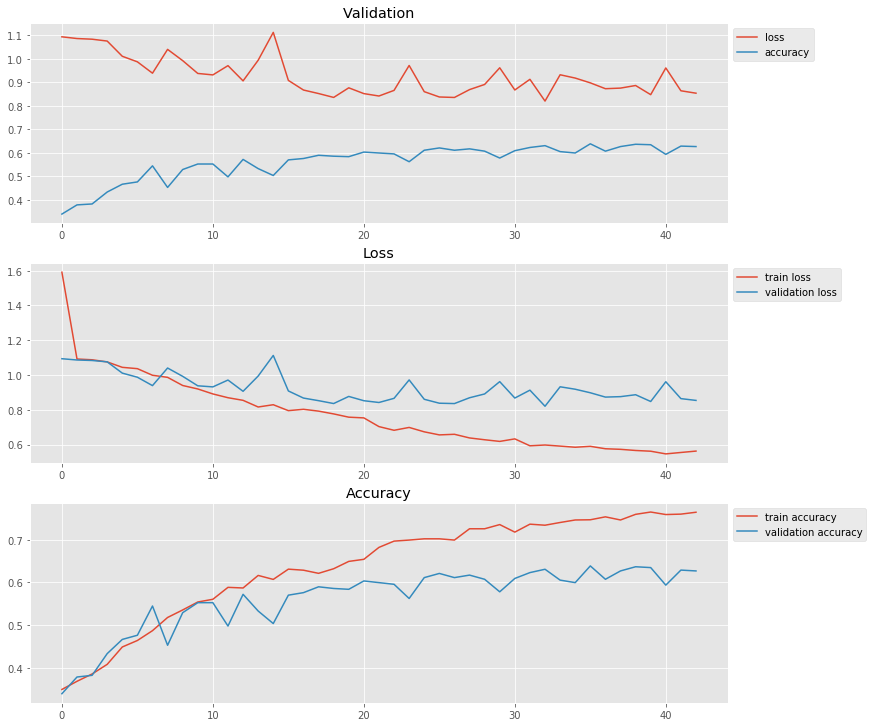

In [12]:
refresh_session()
model = load_model("./trained_models/vgg11_best.hdf5")
acc_scores["vgg11"], conf_matrices["vgg11"], class_reports["vgg11"] \
    = get_test_results(model, val_dat, val_lbls)

print(f"VGG-11 validation accuracy: {acc_scores['vgg11']}")
print("Confusion Matrix:")
print(conf_matrices['vgg11'])
print(class_reports['vgg11'])

log_vgg11 = read_csv("./training_logs/vgg11_log.csv")

plt.figure(figsize=[12.5, 12.5])
plt.subplot(311)
plt.plot(log_vgg11["val_loss"], label="loss")
plt.plot(log_vgg11["val_acc"], label="accuracy")
plt.title("Validation")
plt.legend(loc="upper left", bbox_to_anchor=(1.0, 1.0))

plt.subplot(312)
plt.plot(log_vgg11["loss"], label="train loss")
plt.plot(log_vgg11["val_loss"], label="validation loss")
plt.title("Loss")
plt.legend(loc="upper left", bbox_to_anchor=(1.0, 1.0))

plt.subplot(313)
plt.plot(log_vgg11["acc"], label="train accuracy")
plt.plot(log_vgg11["val_acc"], label="validation accuracy")
plt.title("Accuracy")
plt.legend(loc="upper left", bbox_to_anchor=(1.0, 1.0))


#### VGG-13

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
VGG-13 validation accuracy: 0.63671875
Confusion Matrix:
[[ 83  75   8]
 [ 34 122  17]
 [ 11  41 121]]
                precision    recall  f1-score   support

           car       0.65      0.50      0.56       166
heavy vehicles       0.51      0.71      0.59       173
    motorcycle       0.83      0.70      0.76       173

      accuracy                           0.64       512
     macro avg       0.66      0.63      0.64       512
  weighted avg       0.66      0.64      0.64       512



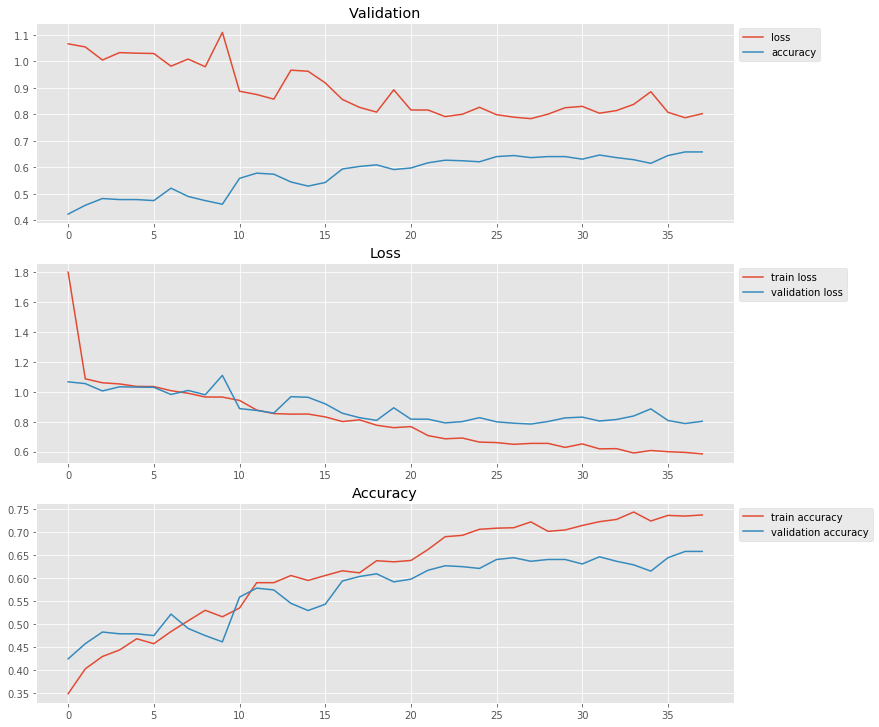

In [7]:
refresh_session()
model = load_model("./trained_models/vgg13_best.hdf5")
acc_scores["vgg13"], conf_matrices["vgg13"], class_reports["vgg13"] \
    = get_test_results(model, val_dat, val_lbls)

print(f"VGG-13 validation accuracy: {acc_scores['vgg13']}")
print("Confusion Matrix:")
print(conf_matrices['vgg13'])
print(class_reports['vgg13'])

log_vgg13 = read_csv("./training_logs/vgg13_log.csv")

plt.figure(figsize=[12.5, 12.5])
plt.subplot(311)
plt.plot(log_vgg13["val_loss"], label="loss")
plt.plot(log_vgg13["val_acc"], label="accuracy")
plt.title("Validation")
plt.legend(loc="upper left", bbox_to_anchor=(1.0, 1.0))

plt.subplot(312)
plt.plot(log_vgg13["loss"], label="train loss")
plt.plot(log_vgg13["val_loss"], label="validation loss")
plt.title("Loss")
plt.legend(loc="upper left", bbox_to_anchor=(1.0, 1.0))

plt.subplot(313)
plt.plot(log_vgg13["acc"], label="train accuracy")
plt.plot(log_vgg13["val_acc"], label="validation accuracy")
plt.title("Accuracy")
plt.legend(loc="upper left", bbox_to_anchor=(1.0, 1.0))


#### VGG-16

VGG-16 validation accuracy: 0.619140625
Confusion Matrix:
[[ 80  74  12]
 [ 39 113  21]
 [ 19  30 124]]
                precision    recall  f1-score   support

           car       0.58      0.48      0.53       166
heavy vehicles       0.52      0.65      0.58       173
    motorcycle       0.79      0.72      0.75       173

      accuracy                           0.62       512
     macro avg       0.63      0.62      0.62       512
  weighted avg       0.63      0.62      0.62       512



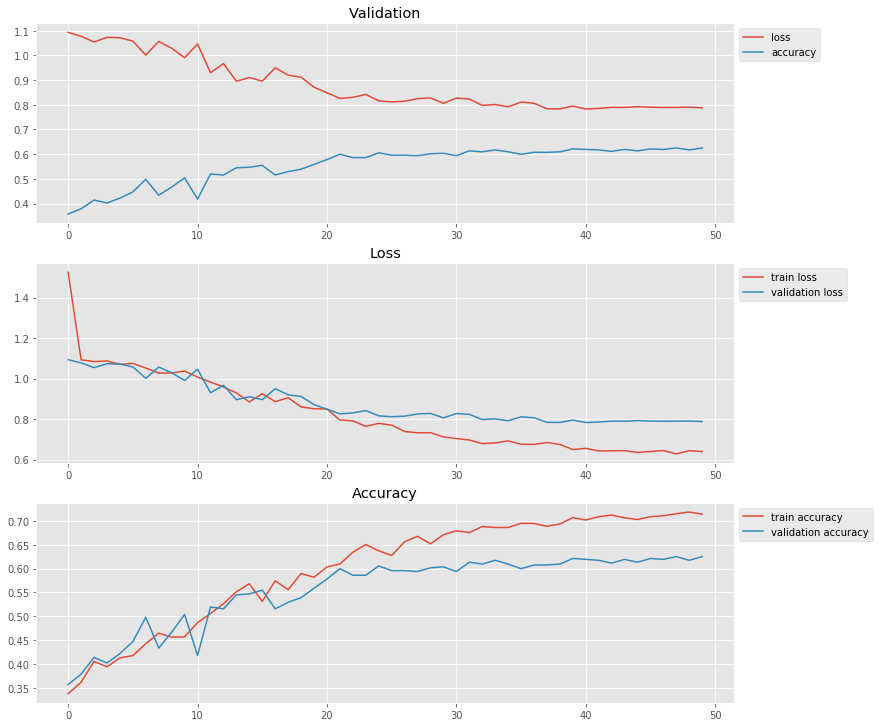

In [8]:
refresh_session()
model = load_model("./trained_models/vgg16_best.hdf5")
acc_scores["vgg16"], conf_matrices["vgg16"], class_reports["vgg16"] \
    = get_test_results(model, val_dat, val_lbls)

print(f"VGG-16 validation accuracy: {acc_scores['vgg16']}")
print("Confusion Matrix:")
print(conf_matrices['vgg16'])
print(class_reports['vgg16'])

log_vgg16 = read_csv("./training_logs/vgg16_log.csv")

plt.figure(figsize=[12.5, 12.5])
plt.subplot(311)
plt.plot(log_vgg16["val_loss"], label="loss")
plt.plot(log_vgg16["val_acc"], label="accuracy")
plt.title("Validation")
plt.legend(loc="upper left", bbox_to_anchor=(1.0, 1.0))

plt.subplot(312)
plt.plot(log_vgg16["loss"], label="train loss")
plt.plot(log_vgg16["val_loss"], label="validation loss")
plt.title("Loss")
plt.legend(loc="upper left", bbox_to_anchor=(1.0, 1.0))

plt.subplot(313)
plt.plot(log_vgg16["acc"], label="train accuracy")
plt.plot(log_vgg16["val_acc"], label="validation accuracy")
plt.title("Accuracy")
plt.legend(loc="upper left", bbox_to_anchor=(1.0, 1.0))


#### VGG-16(Conv1)

VGG-16_conv1 validation accuracy: 0.64453125
Confusion Matrix:
[[ 93  61  12]
 [ 36 119  18]
 [ 14  41 118]]
                precision    recall  f1-score   support

           car       0.65      0.56      0.60       166
heavy vehicles       0.54      0.69      0.60       173
    motorcycle       0.80      0.68      0.74       173

      accuracy                           0.64       512
     macro avg       0.66      0.64      0.65       512
  weighted avg       0.66      0.64      0.65       512



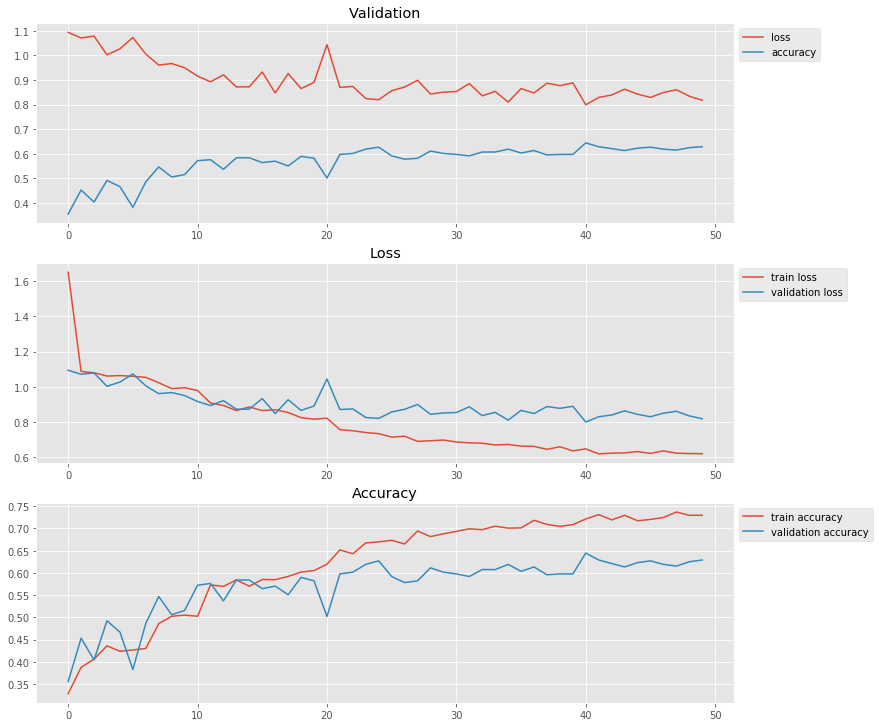

In [9]:
refresh_session()
model = load_model("./trained_models/vgg16_conv1_best.hdf5")
acc_scores["vgg16_conv1"], conf_matrices["vgg16_conv1"], \
class_reports["vgg16_conv1"] = get_test_results(model, val_dat, val_lbls)

print(f"VGG-16_conv1 validation accuracy: {acc_scores['vgg16_conv1']}")
print("Confusion Matrix:")
print(conf_matrices['vgg16_conv1'])
print(class_reports['vgg16_conv1'])

log_vgg16_conv1 = read_csv("./training_logs/vgg16_conv1_log.csv")

plt.figure(figsize=[12.5, 12.5])
plt.subplot(311)
plt.plot(log_vgg16_conv1["val_loss"], label="loss")
plt.plot(log_vgg16_conv1["val_acc"], label="accuracy")
plt.title("Validation")
plt.legend(loc="upper left", bbox_to_anchor=(1.0, 1.0))

plt.subplot(312)
plt.plot(log_vgg16_conv1["loss"], label="train loss")
plt.plot(log_vgg16_conv1["val_loss"], label="validation loss")
plt.title("Loss")
plt.legend(loc="upper left", bbox_to_anchor=(1.0, 1.0))

plt.subplot(313)
plt.plot(log_vgg16_conv1["acc"], label="train accuracy")
plt.plot(log_vgg16_conv1["val_acc"], label="validation accuracy")
plt.title("Accuracy")
plt.legend(loc="upper left", bbox_to_anchor=(1.0, 1.0))


#### VGG-19

VGG-19 validation accuracy: 0.5859375
Confusion Matrix:
[[ 72  73  21]
 [ 36 103  34]
 [ 13  35 125]]
                precision    recall  f1-score   support

           car       0.60      0.43      0.50       166
heavy vehicles       0.49      0.60      0.54       173
    motorcycle       0.69      0.72      0.71       173

      accuracy                           0.59       512
     macro avg       0.59      0.58      0.58       512
  weighted avg       0.59      0.59      0.58       512



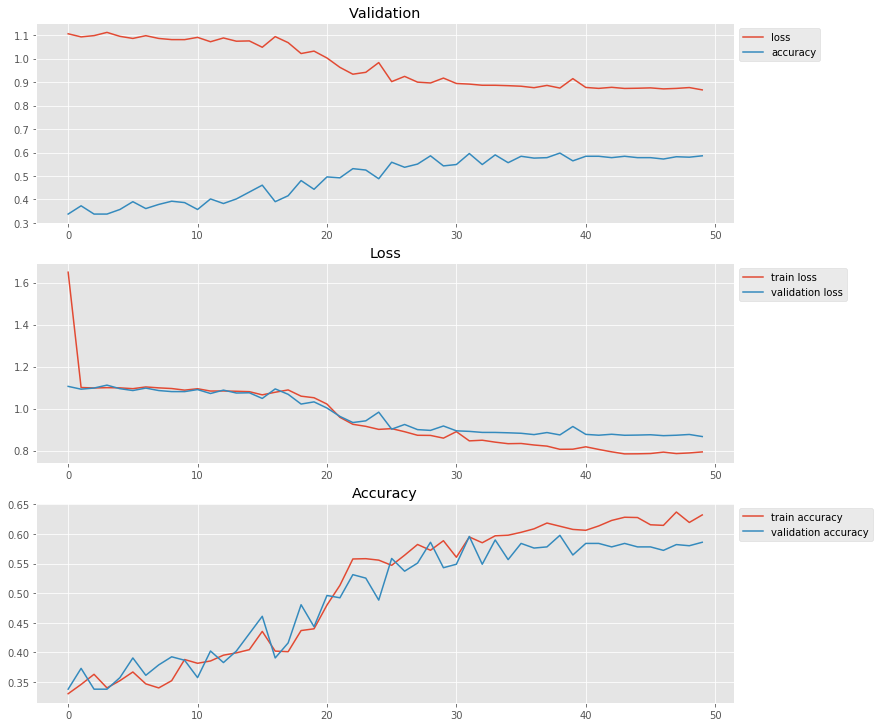

In [10]:
refresh_session()
model = load_model("./trained_models/vgg19_best.hdf5")
acc_scores["vgg19"], conf_matrices["vgg19"], class_reports["vgg19"] \
    = get_test_results(model, val_dat, val_lbls)

print(f"VGG-19 validation accuracy: {acc_scores['vgg19']}")
print("Confusion Matrix:")
print(conf_matrices['vgg19'])
print(class_reports['vgg19'])

log_vgg19 = read_csv("./training_logs/vgg19_log.csv")

plt.figure(figsize=[12.5, 12.5])
plt.subplot(311)
plt.plot(log_vgg19["val_loss"], label="loss")
plt.plot(log_vgg19["val_acc"], label="accuracy")
plt.title("Validation")
plt.legend(loc="upper left", bbox_to_anchor=(1.0, 1.0))

plt.subplot(312)
plt.plot(log_vgg19["loss"], label="train loss")
plt.plot(log_vgg19["val_loss"], label="validation loss")
plt.title("Loss")
plt.legend(loc="upper left", bbox_to_anchor=(1.0, 1.0))

plt.subplot(313)
plt.plot(log_vgg19["acc"], label="train accuracy")
plt.plot(log_vgg19["val_acc"], label="validation accuracy")
plt.title("Accuracy")
plt.legend(loc="upper left", bbox_to_anchor=(1.0, 1.0))


#### Cross-Model Comparison

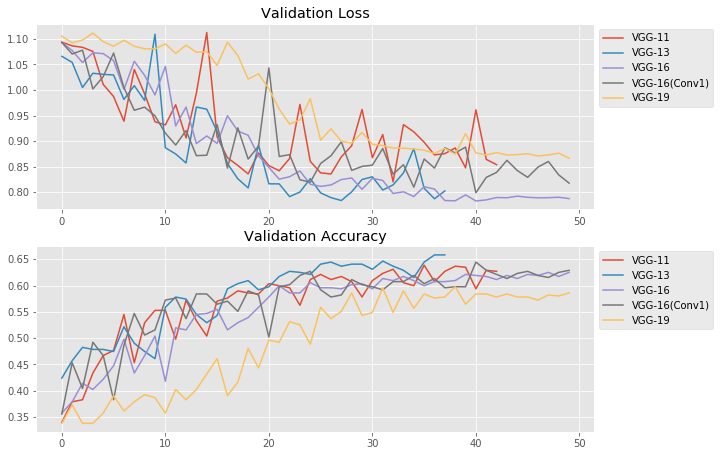

In [13]:
plt.figure(figsize=[10, 7.5])
plt.subplot(211)
plt.plot(log_vgg11["val_loss"], label="VGG-11")
plt.plot(log_vgg13["val_loss"], label="VGG-13")
plt.plot(log_vgg16["val_loss"], label="VGG-16")
plt.plot(log_vgg16_conv1["val_loss"], label="VGG-16(Conv1)")
plt.plot(log_vgg19["val_loss"], label="VGG-19")
plt.title("Validation Loss")
plt.legend(loc="upper left", bbox_to_anchor=(1.0, 1.0))

plt.subplot(212)
plt.plot(log_vgg11["val_acc"], label="VGG-11")
plt.plot(log_vgg13["val_acc"], label="VGG-13")
plt.plot(log_vgg16["val_acc"], label="VGG-16")
plt.plot(log_vgg16_conv1["val_acc"], label="VGG-16(Conv1)")
plt.plot(log_vgg19["val_acc"], label="VGG-19")
plt.title("Validation Accuracy")
plt.legend(loc="upper left", bbox_to_anchor=(1.0, 1.0))



